[*********************100%***********************]  1 of 1 completed


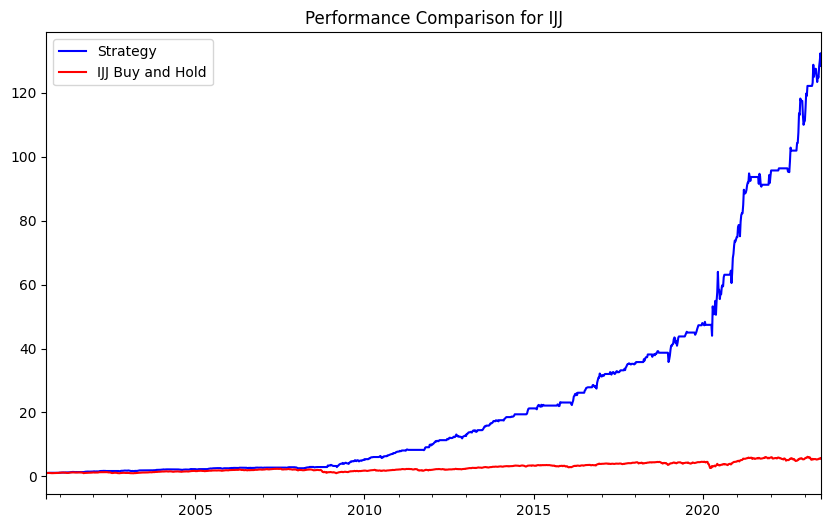

For IJJ:
Strategy: CAGR: 23.62%, Max Drawdown: -19.38%, Sharpe Ratio: 1.52
IJJ Buy and Hold: CAGR: 7.88%, Max Drawdown: -59.03%, Sharpe Ratio: 0.46
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


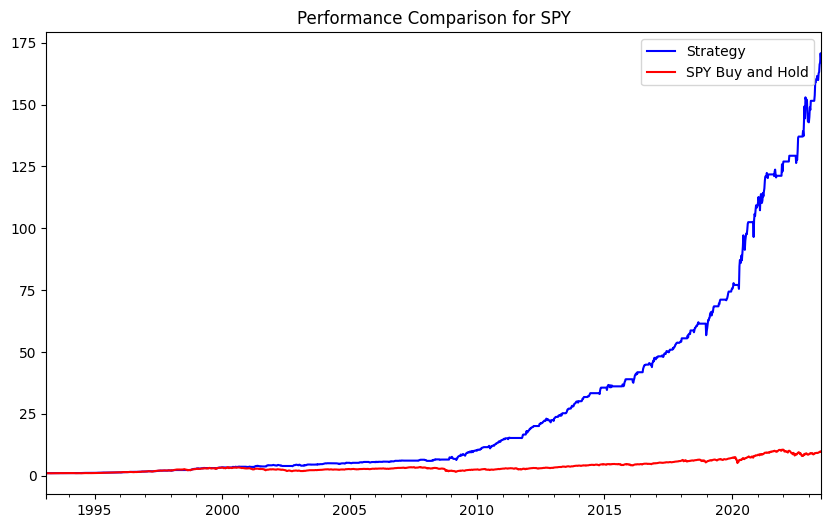

For SPY:
Strategy: CAGR: 18.37%, Max Drawdown: -16.94%, Sharpe Ratio: 1.57
SPY Buy and Hold: CAGR: 7.78%, Max Drawdown: -55.91%, Sharpe Ratio: 0.52
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


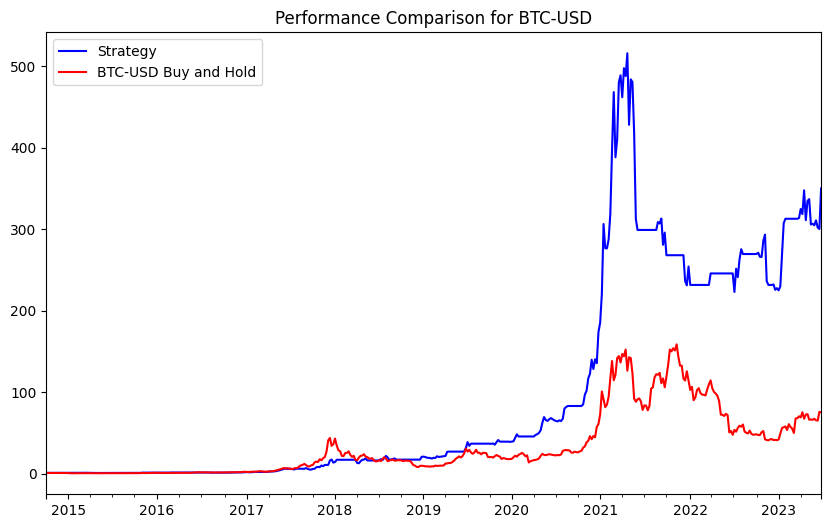

For BTC-USD:
Strategy: CAGR: 95.39%, Max Drawdown: -56.77%, Sharpe Ratio: 1.52
BTC-USD Buy and Hold: CAGR: 63.91%, Max Drawdown: -81.69%, Sharpe Ratio: 1.04
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


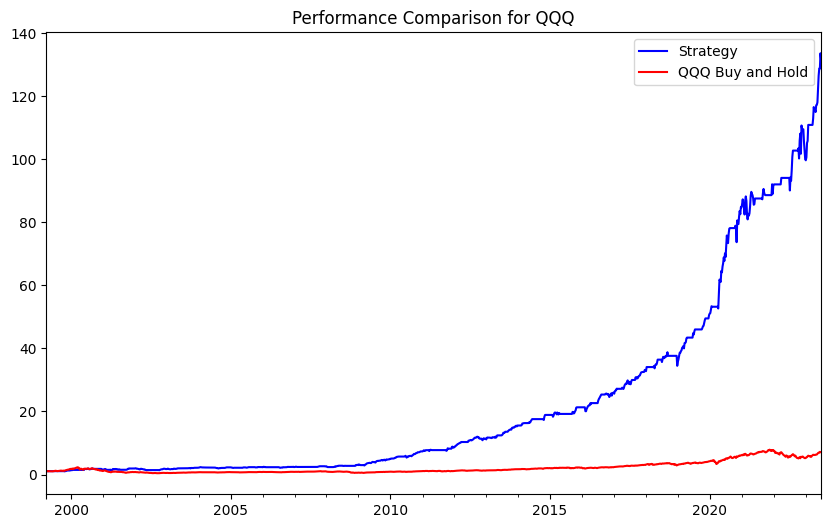

For QQQ:
Strategy: CAGR: 22.26%, Max Drawdown: -32.92%, Sharpe Ratio: 1.26
QQQ Buy and Hold: CAGR: 8.41%, Max Drawdown: -82.69%, Sharpe Ratio: 0.45
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


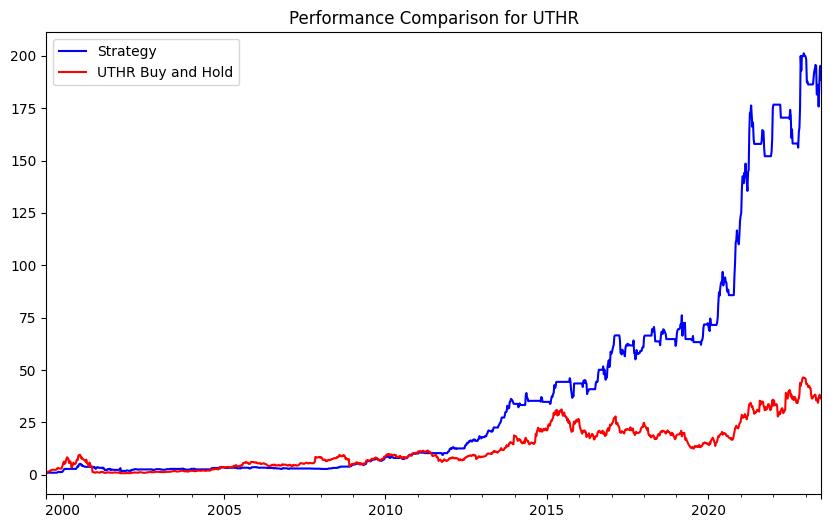

For UTHR:
Strategy: CAGR: 24.38%, Max Drawdown: -66.85%, Sharpe Ratio: 0.87
UTHR Buy and Hold: CAGR: 16.15%, Max Drawdown: -92.33%, Sharpe Ratio: 0.57
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


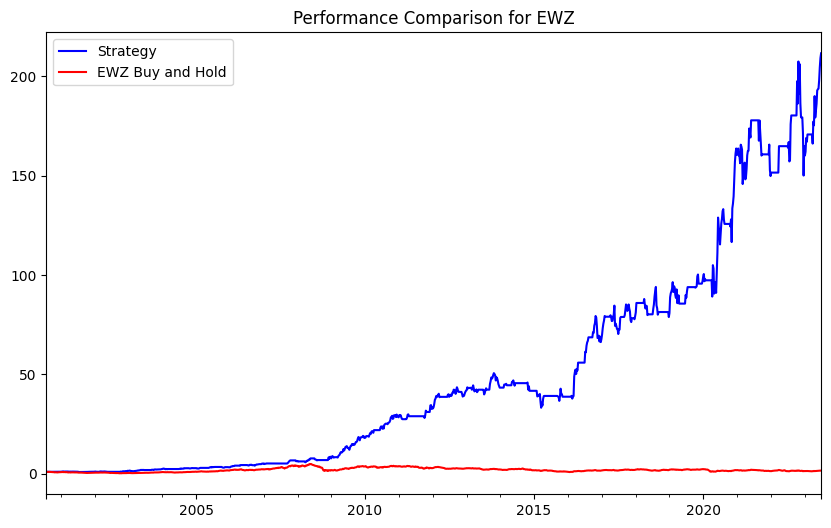

For EWZ:
Strategy: CAGR: 26.30%, Max Drawdown: -34.32%, Sharpe Ratio: 1.05
EWZ Buy and Hold: CAGR: 2.10%, Max Drawdown: -81.84%, Sharpe Ratio: 0.24
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


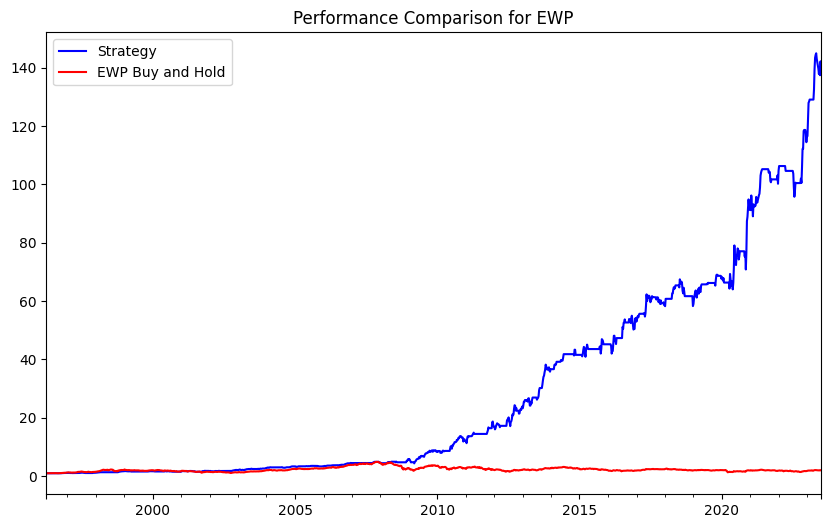

For EWP:
Strategy: CAGR: 19.83%, Max Drawdown: -25.30%, Sharpe Ratio: 1.12
EWP Buy and Hold: CAGR: 2.70%, Max Drawdown: -73.09%, Sharpe Ratio: 0.23
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


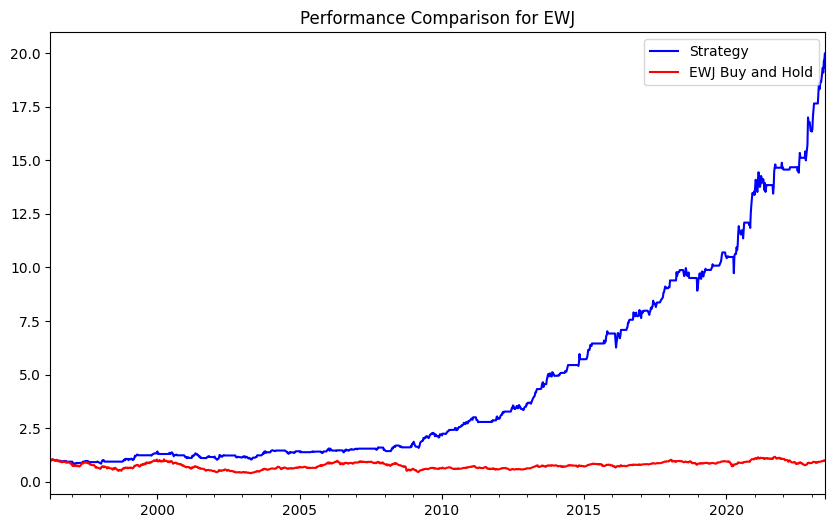

For EWJ:
Strategy: CAGR: 11.47%, Max Drawdown: -27.19%, Sharpe Ratio: 0.88
EWJ Buy and Hold: CAGR: -0.07%, Max Drawdown: -62.18%, Sharpe Ratio: 0.10
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


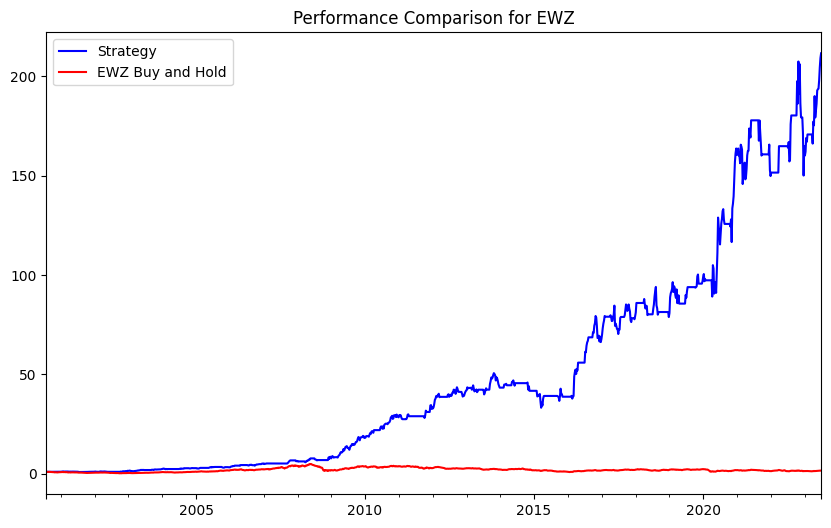

For EWZ:
Strategy: CAGR: 26.30%, Max Drawdown: -34.32%, Sharpe Ratio: 1.05
EWZ Buy and Hold: CAGR: 2.10%, Max Drawdown: -81.84%, Sharpe Ratio: 0.24
--------------------------------------------------


In [46]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Read the NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=2).mean()  # Corrected window size

tickers = ['IJJ', 'SPY', 'BTC-USD', 'QQQ', 'UTHR', 'EWZ', 'EWP', 'EWJ', 'EWZ']  # Added BTC-USD for Bitcoin

for ticker in tickers:
    # Download data for the ticker
    stock_data = yf.download(ticker, start=nfci_data.index.min(), end=nfci_data.index.max())
    stock_data = stock_data[['Close']].resample("W-FRI").last()

    # Merge the two dataframes
    data = stock_data.join(nfci_data, how='inner')

    # Create a signal
    data['signal'] = np.where(data['NFCI'] < data['nfci_sma_14'], 1, 0)

    # Calculate strategy returns
    data['strategy_returns'] = data['Close'].shift(1).pct_change() * data['signal']
    data['stock_returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Plot the strategy and stock performance
    plt.figure(figsize=(10, 6))
    (data['strategy_returns'] + 1).cumprod().plot(label='Strategy', color='b')
    (data['stock_returns'] + 1).cumprod().plot(label=f'{ticker} Buy and Hold', color='r')
    plt.title(f'Performance Comparison for {ticker}')
    plt.legend()
    plt.show()

    # Annualizing factor assuming trading days
    annualizing_factor = 52

    # CAGR
    years = (data.index[-1] - data.index[0]).days / 365.0
    cagr_strategy = (1 + data['strategy_returns']).cumprod().iloc[-1] ** (1 / years) - 1
    cagr_stock = (1 + data['stock_returns']).cumprod().iloc[-1] ** (1 / years) - 1

    # Max Drawdown
    cumulative_returns_strategy = (1 + data['strategy_returns']).cumprod()
    rolling_max_strategy = cumulative_returns_strategy.expanding().max()
    daily_drawdown_strategy = cumulative_returns_strategy / rolling_max_strategy - 1
    max_drawdown_strategy = daily_drawdown_strategy.min()

    cumulative_returns_stock = (1 + data['stock_returns']).cumprod()
    rolling_max_stock = cumulative_returns_stock.expanding().max()
    daily_drawdown_stock = cumulative_returns_stock / rolling_max_stock - 1
    max_drawdown_stock = daily_drawdown_stock.min()

    # Sharpe Ratio (assuming risk-free rate to be 0)
    sharpe_ratio_strategy = np.mean(data['strategy_returns']) / np.std(data['strategy_returns']) * np.sqrt(annualizing_factor)
    sharpe_ratio_stock = np.mean(data['stock_returns']) / np.std(data['stock_returns']) * np.sqrt(annualizing_factor)

    # Printing the results
    print(f"For {ticker}:")
    print(f"Strategy: CAGR: {cagr_strategy:.2%}, Max Drawdown: {max_drawdown_strategy:.2%}, Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"{ticker} Buy and Hold: CAGR: {cagr_stock:.2%}, Max Drawdown: {max_drawdown_stock:.2%}, Sharpe Ratio: {sharpe_ratio_stock:.2f}")
    print("-" * 50)


[*********************100%***********************]  1 of 1 completed


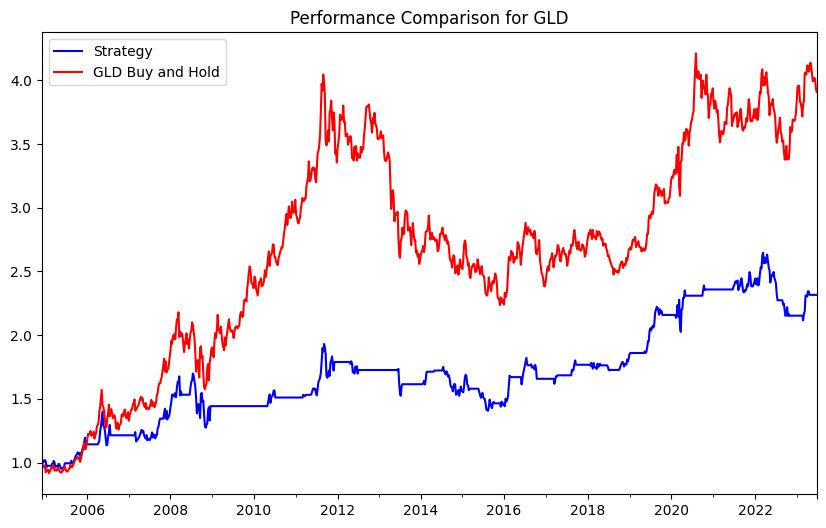

For GLD:
Strategy: CAGR: 4.62%, Max Drawdown: -27.15%, Sharpe Ratio: 0.41
GLD Buy and Hold: CAGR: 7.61%, Max Drawdown: -44.74%, Sharpe Ratio: 0.51
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


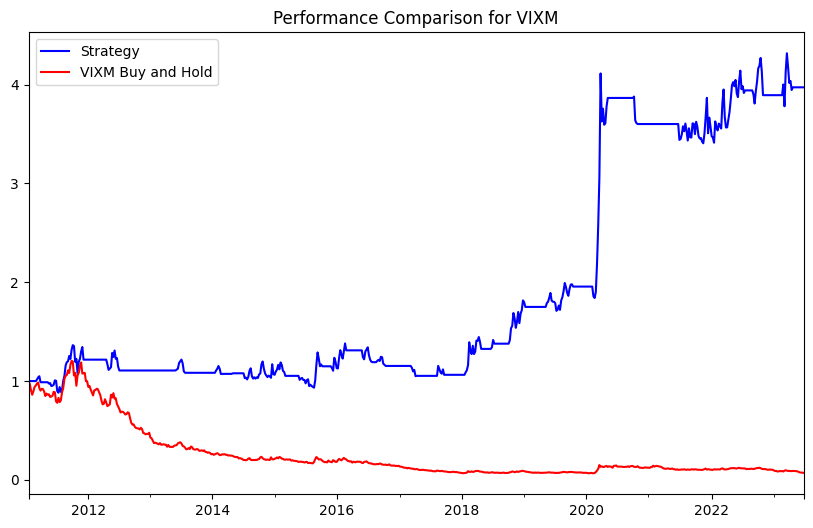

For VIXM:
Strategy: CAGR: 11.72%, Max Drawdown: -31.55%, Sharpe Ratio: 0.56
VIXM Buy and Hold: CAGR: -19.20%, Max Drawdown: -94.46%, Sharpe Ratio: -0.52
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


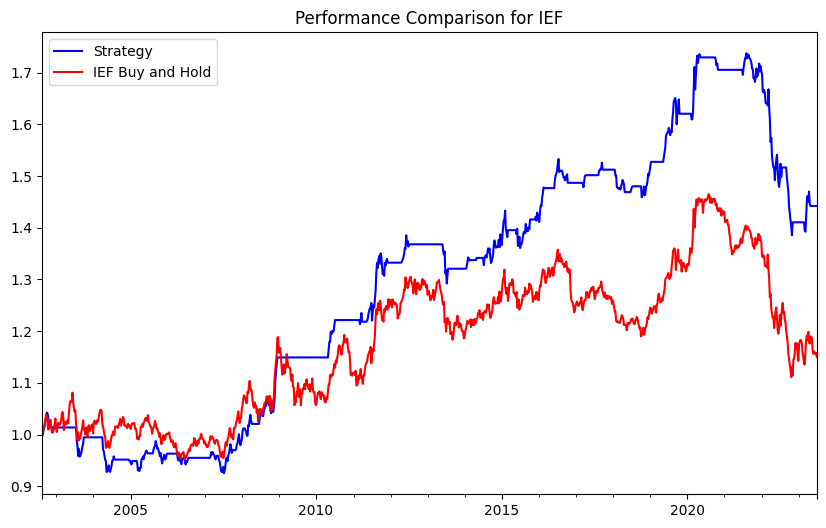

For IEF:
Strategy: CAGR: 1.77%, Max Drawdown: -20.27%, Sharpe Ratio: 0.40
IEF Buy and Hold: CAGR: 0.67%, Max Drawdown: -24.15%, Sharpe Ratio: 0.14
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


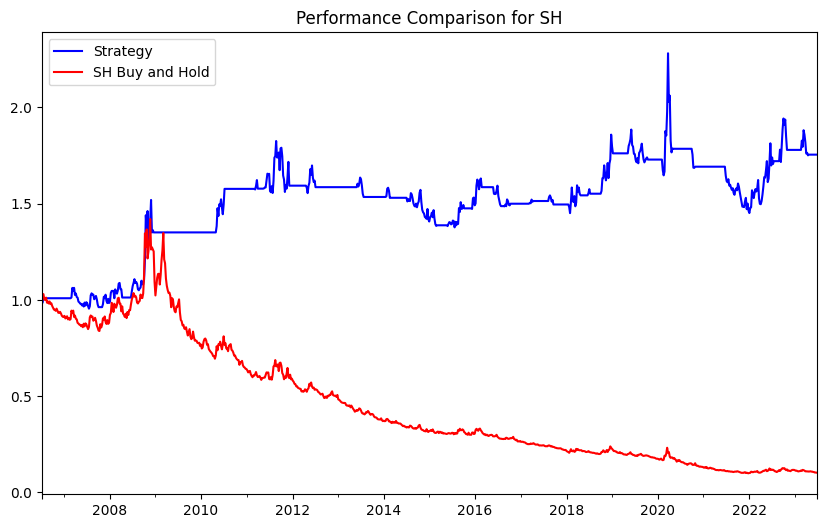

For SH:
Strategy: CAGR: 3.37%, Max Drawdown: -36.38%, Sharpe Ratio: 0.29
SH Buy and Hold: CAGR: -12.54%, Max Drawdown: -92.99%, Sharpe Ratio: -0.63
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


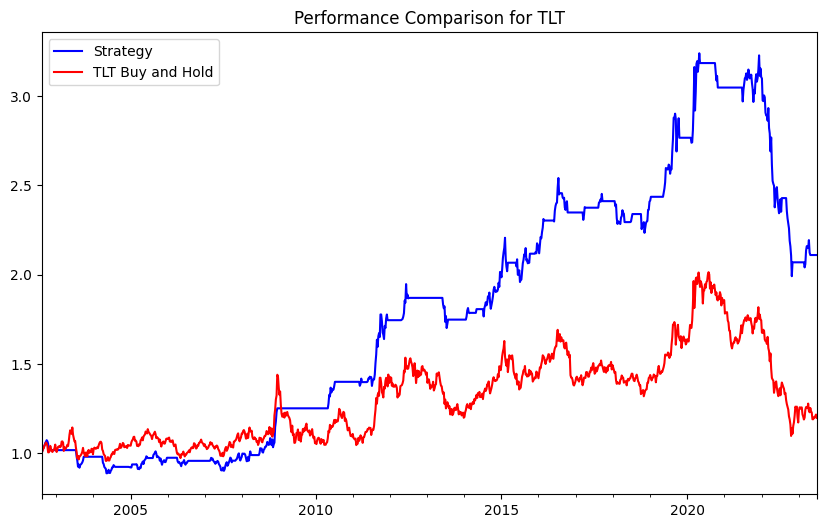

For TLT:
Strategy: CAGR: 3.64%, Max Drawdown: -38.52%, Sharpe Ratio: 0.42
TLT Buy and Hold: CAGR: 0.87%, Max Drawdown: -45.51%, Sharpe Ratio: 0.13
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


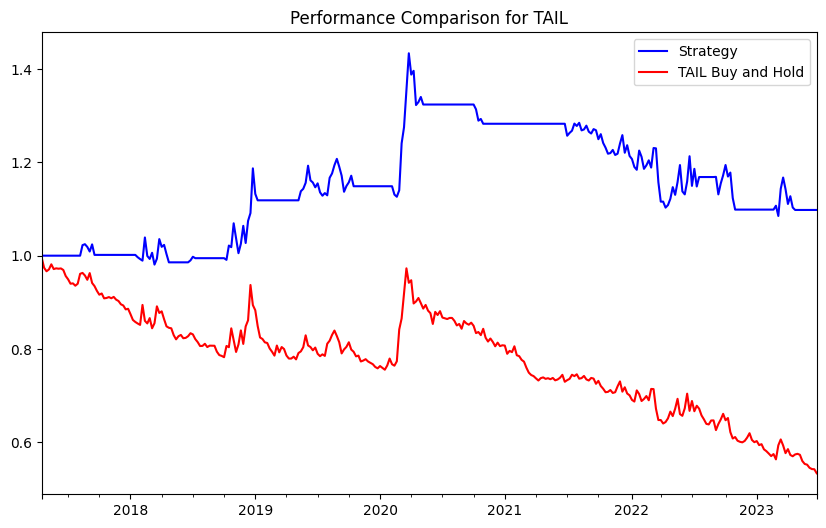

For TAIL:
Strategy: CAGR: 1.52%, Max Drawdown: -24.32%, Sharpe Ratio: 0.18
TAIL Buy and Hold: CAGR: -9.65%, Max Drawdown: -46.39%, Sharpe Ratio: -0.68
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


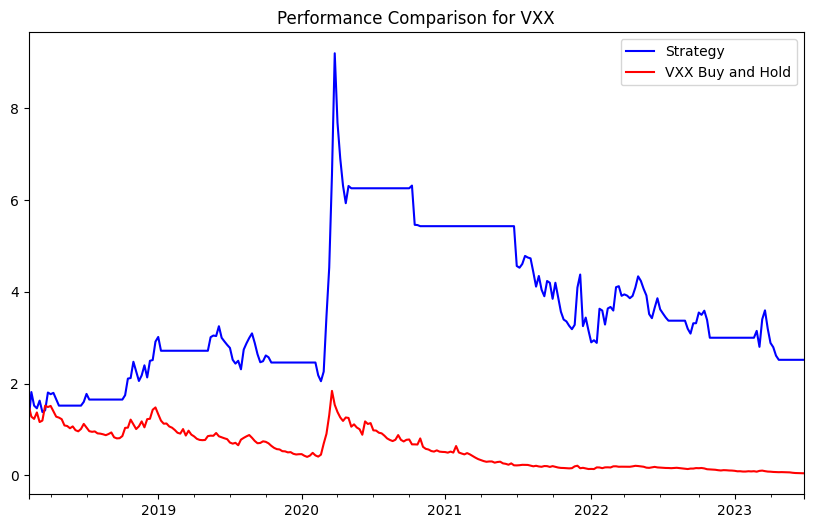

For VXX:
Strategy: CAGR: 18.71%, Max Drawdown: -72.60%, Sharpe Ratio: 0.55
VXX Buy and Hold: CAGR: -43.02%, Max Drawdown: -97.38%, Sharpe Ratio: -0.43
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


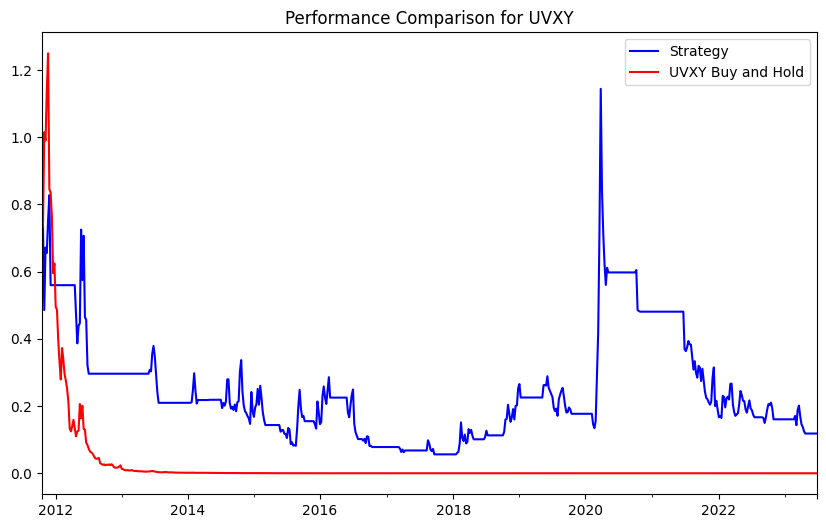

For UVXY:
Strategy: CAGR: -16.68%, Max Drawdown: -93.20%, Sharpe Ratio: 0.23
UVXY Buy and Hold: CAGR: -82.27%, Max Drawdown: -100.00%, Sharpe Ratio: -0.95
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


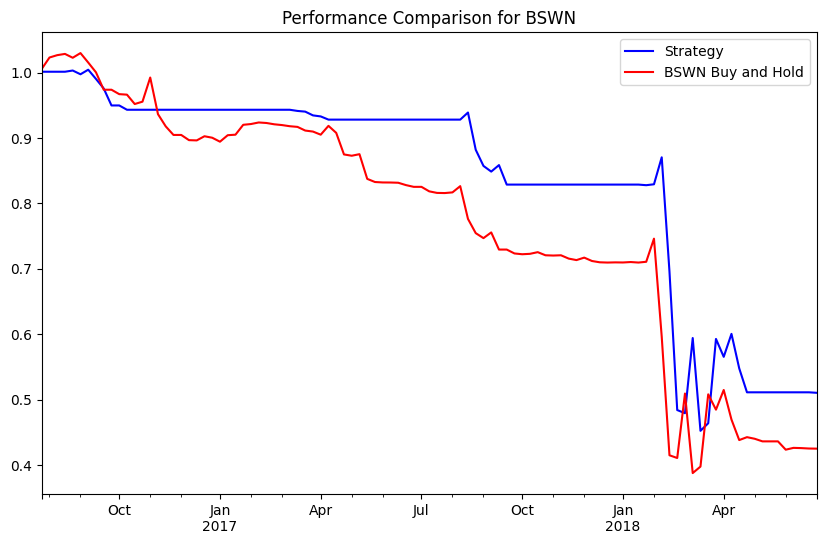

For BSWN:
Strategy: CAGR: -29.59%, Max Drawdown: -54.98%, Sharpe Ratio: -0.59
BSWN Buy and Hold: CAGR: -36.00%, Max Drawdown: -62.37%, Sharpe Ratio: -0.79
--------------------------------------------------


In [42]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Read the NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=14).mean()  # Corrected window size

tickers = ['GLD', 'VIXM', 'IEF', 'SH', 'TLT', 'TAIL','VXX','UVXY', 'BSWN']  # Added BTC-USD for Bitcoin

for ticker in tickers:
    # Download data for the ticker
    stock_data = yf.download(ticker, start=nfci_data.index.min(), end=nfci_data.index.max())
    stock_data = stock_data[['Close']].resample("W-FRI").last()

    # Merge the two dataframes
    data = stock_data.join(nfci_data, how='inner')

    # Create a signal
    data['signal'] = np.where(data['NFCI'] > data['nfci_sma_14'], 1, 0)

    # Calculate strategy returns
    data['strategy_returns'] = data['Close'].shift(1).pct_change() * data['signal']
    data['stock_returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Plot the strategy and stock performance
    plt.figure(figsize=(10, 6))
    (data['strategy_returns'] + 1).cumprod().plot(label='Strategy', color='b')
    (data['stock_returns'] + 1).cumprod().plot(label=f'{ticker} Buy and Hold', color='r')
    plt.title(f'Performance Comparison for {ticker}')
    plt.legend()
    plt.show()

    # Annualizing factor assuming trading days
    annualizing_factor = 52

    # CAGR
    years = (data.index[-1] - data.index[0]).days / 365.0
    cagr_strategy = (1 + data['strategy_returns']).cumprod().iloc[-1] ** (1 / years) - 1
    cagr_stock = (1 + data['stock_returns']).cumprod().iloc[-1] ** (1 / years) - 1

    # Max Drawdown
    cumulative_returns_strategy = (1 + data['strategy_returns']).cumprod()
    rolling_max_strategy = cumulative_returns_strategy.expanding().max()
    daily_drawdown_strategy = cumulative_returns_strategy / rolling_max_strategy - 1
    max_drawdown_strategy = daily_drawdown_strategy.min()

    cumulative_returns_stock = (1 + data['stock_returns']).cumprod()
    rolling_max_stock = cumulative_returns_stock.expanding().max()
    daily_drawdown_stock = cumulative_returns_stock / rolling_max_stock - 1
    max_drawdown_stock = daily_drawdown_stock.min()

    # Sharpe Ratio (assuming risk-free rate to be 0)
    sharpe_ratio_strategy = np.mean(data['strategy_returns']) / np.std(data['strategy_returns']) * np.sqrt(annualizing_factor)
    sharpe_ratio_stock = np.mean(data['stock_returns']) / np.std(data['stock_returns']) * np.sqrt(annualizing_factor)

    # Printing the results
    print(f"For {ticker}:")
    print(f"Strategy: CAGR: {cagr_strategy:.2%}, Max Drawdown: {max_drawdown_strategy:.2%}, Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"{ticker} Buy and Hold: CAGR: {cagr_stock:.2%}, Max Drawdown: {max_drawdown_stock:.2%}, Sharpe Ratio: {sharpe_ratio_stock:.2f}")
    print("-" * 50)


[*********************100%***********************]  1 of 1 completed


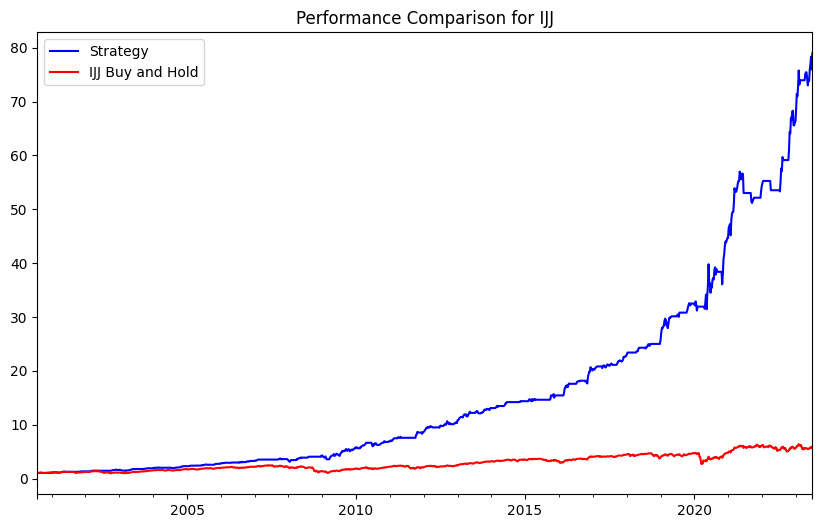

For IJJ:
Strategy: CAGR: 21.00%, Max Drawdown: -16.90%, Sharpe Ratio: 1.53
IJJ Buy and Hold: CAGR: 8.08%, Max Drawdown: -59.03%, Sharpe Ratio: 0.47
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


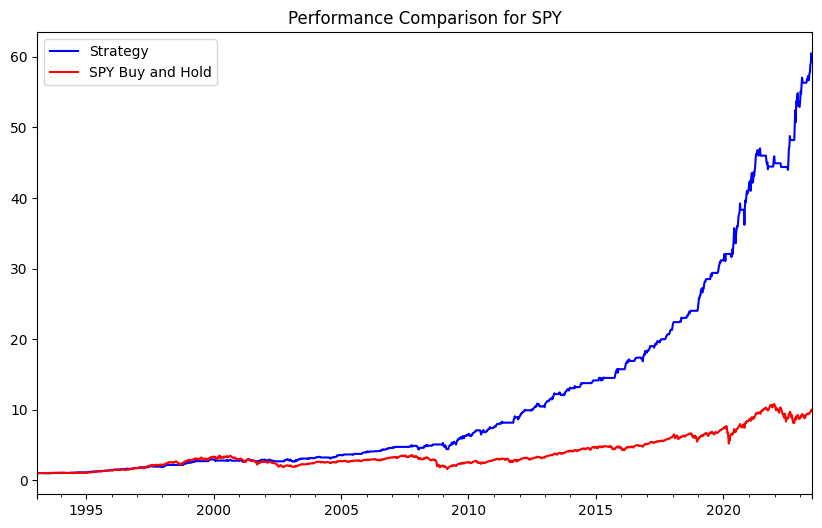

For SPY:
Strategy: CAGR: 14.43%, Max Drawdown: -16.72%, Sharpe Ratio: 1.36
SPY Buy and Hold: CAGR: 7.85%, Max Drawdown: -55.91%, Sharpe Ratio: 0.52
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


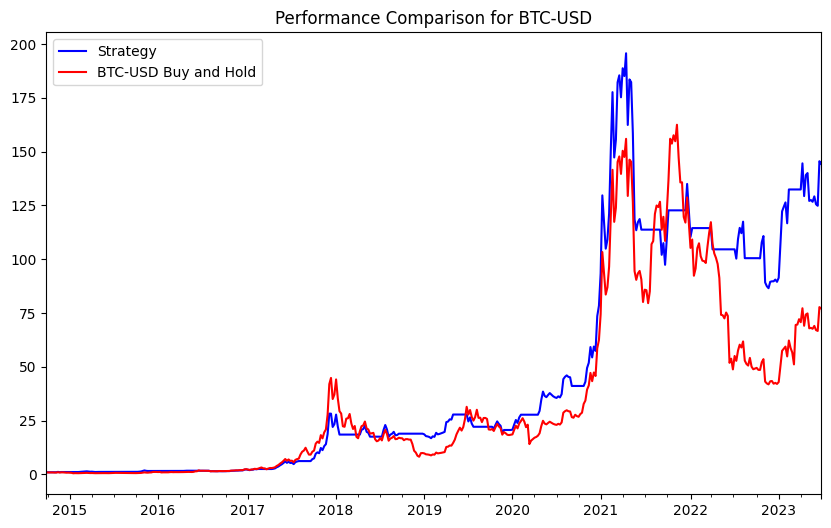

For BTC-USD:
Strategy: CAGR: 76.36%, Max Drawdown: -55.78%, Sharpe Ratio: 1.31
BTC-USD Buy and Hold: CAGR: 64.18%, Max Drawdown: -81.69%, Sharpe Ratio: 1.04
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


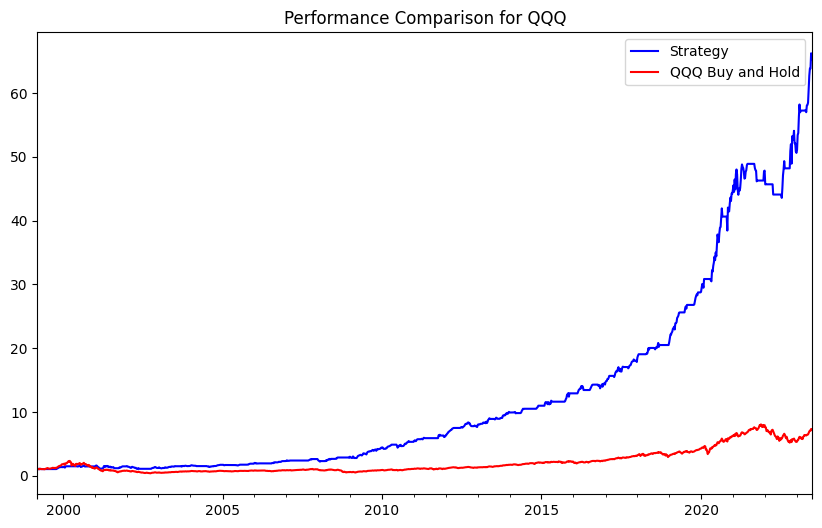

For QQQ:
Strategy: CAGR: 18.78%, Max Drawdown: -33.44%, Sharpe Ratio: 1.12
QQQ Buy and Hold: CAGR: 8.50%, Max Drawdown: -82.69%, Sharpe Ratio: 0.45
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


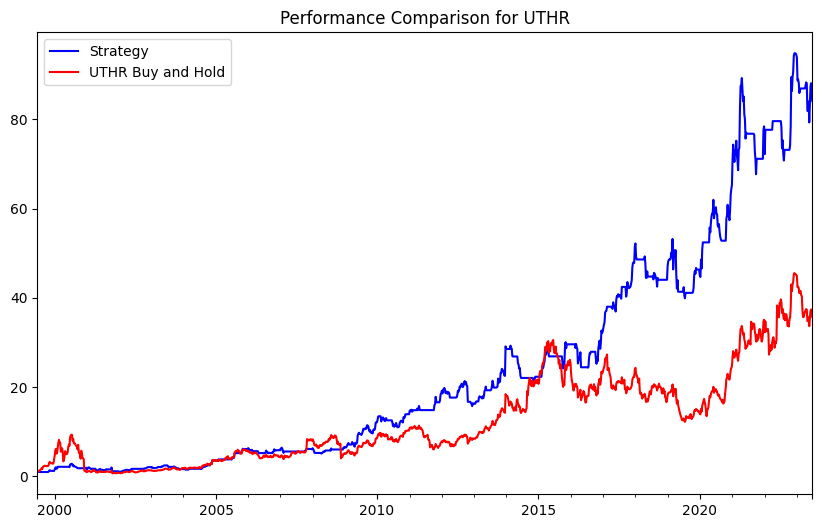

For UTHR:
Strategy: CAGR: 20.25%, Max Drawdown: -63.62%, Sharpe Ratio: 0.74
UTHR Buy and Hold: CAGR: 16.04%, Max Drawdown: -92.33%, Sharpe Ratio: 0.57
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


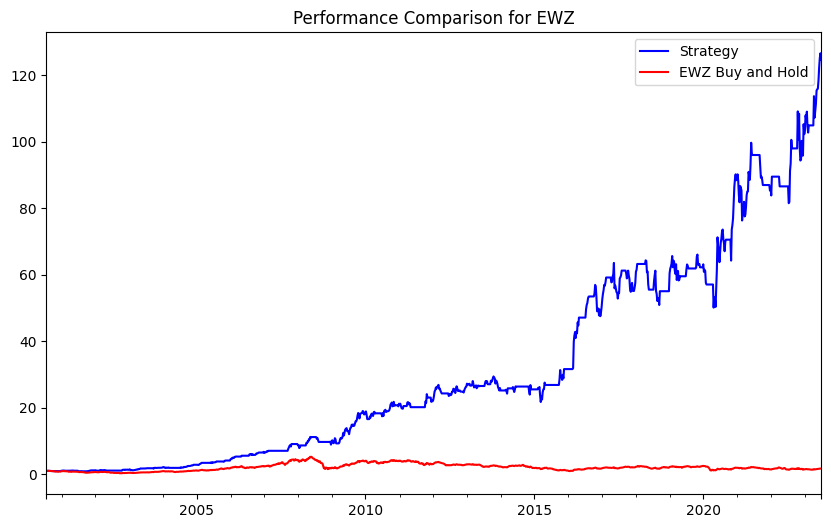

For EWZ:
Strategy: CAGR: 23.39%, Max Drawdown: -26.09%, Sharpe Ratio: 0.99
EWZ Buy and Hold: CAGR: 2.35%, Max Drawdown: -81.84%, Sharpe Ratio: 0.25
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


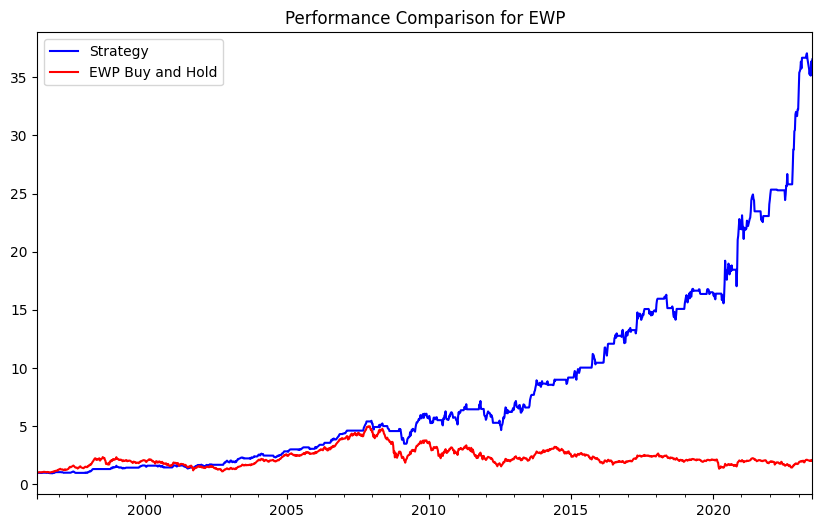

For EWP:
Strategy: CAGR: 14.10%, Max Drawdown: -36.07%, Sharpe Ratio: 0.89
EWP Buy and Hold: CAGR: 2.75%, Max Drawdown: -73.09%, Sharpe Ratio: 0.23
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


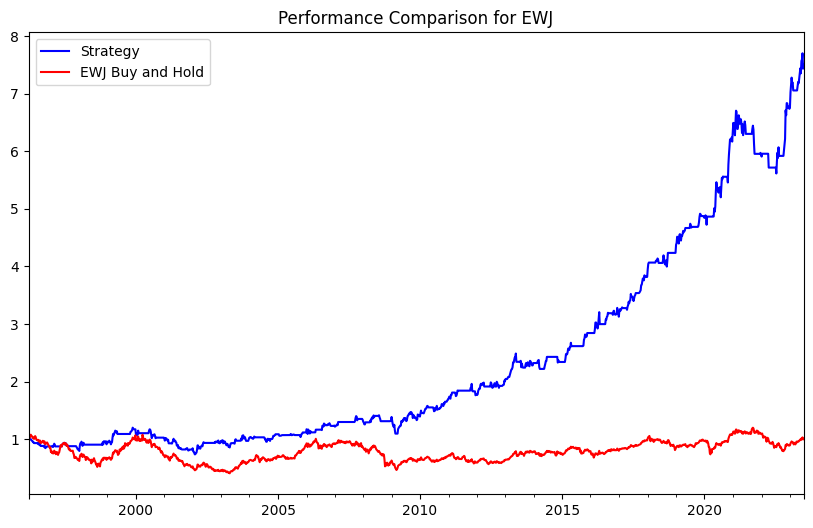

For EWJ:
Strategy: CAGR: 7.67%, Max Drawdown: -38.68%, Sharpe Ratio: 0.63
EWJ Buy and Hold: CAGR: 0.02%, Max Drawdown: -62.18%, Sharpe Ratio: 0.10
--------------------------------------------------
[*********************100%***********************]  1 of 1 completed


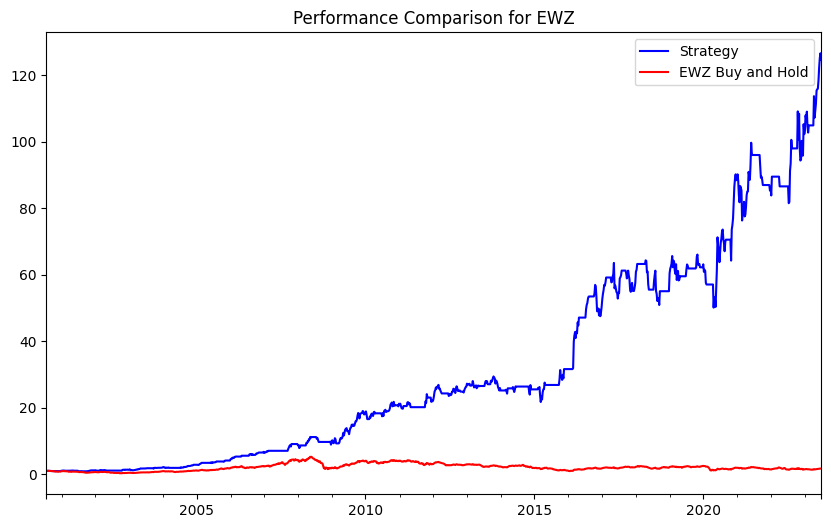

For EWZ:
Strategy: CAGR: 23.39%, Max Drawdown: -26.09%, Sharpe Ratio: 0.99
EWZ Buy and Hold: CAGR: 2.35%, Max Drawdown: -81.84%, Sharpe Ratio: 0.25
--------------------------------------------------


In [47]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Read the NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=2).mean().shift(1)  # Shifted by 1 day to avoid look-ahead bias

tickers = ['IJJ', 'SPY', 'BTC-USD', 'QQQ', 'UTHR', 'EWZ', 'EWP', 'EWJ', 'EWZ']

for ticker in tickers:
    # Download data for the ticker
    stock_data = yf.download(ticker, start=nfci_data.index.min(), end=nfci_data.index.max())
    stock_data = stock_data[['Close']].resample("W-FRI").last()

    # Merge the two dataframes
    data = stock_data.join(nfci_data, how='inner')

    # Create a signal
    data['signal'] = np.where(data['NFCI'] < data['nfci_sma_14'], 1, 0)

    # Calculate strategy returns using the signal from the previous day
    data['strategy_returns'] = data['Close'].pct_change() * data['signal'].shift(1)
    data['stock_returns'] = data['Close'].pct_change()

    # Drop missing values
    data.dropna(inplace=True)

    # Plot the strategy and stock performance
    plt.figure(figsize=(10, 6))
    (data['strategy_returns'] + 1).cumprod().plot(label='Strategy', color='b')
    (data['stock_returns'] + 1).cumprod().plot(label=f'{ticker} Buy and Hold', color='r')
    plt.title(f'Performance Comparison for {ticker}')
    plt.legend()
    plt.show()

    # Annualizing factor assuming trading days
    annualizing_factor = 52

    # CAGR
    years = (data.index[-1] - data.index[0]).days / 365.0
    cagr_strategy = (1 + data['strategy_returns']).cumprod().iloc[-1] ** (1 / years) - 1
    cagr_stock = (1 + data['stock_returns']).cumprod().iloc[-1] ** (1 / years) - 1

    # Max Drawdown
    cumulative_returns_strategy = (1 + data['strategy_returns']).cumprod()
    rolling_max_strategy = cumulative_returns_strategy.expanding().max()
    daily_drawdown_strategy = cumulative_returns_strategy / rolling_max_strategy - 1
    max_drawdown_strategy = daily_drawdown_strategy.min()

    cumulative_returns_stock = (1 + data['stock_returns']).cumprod()
    rolling_max_stock = cumulative_returns_stock.expanding().max()
    daily_drawdown_stock = cumulative_returns_stock / rolling_max_stock - 1
    max_drawdown_stock = daily_drawdown_stock.min()

    # Sharpe Ratio (assuming risk-free rate to be 0)
    sharpe_ratio_strategy = np.mean(data['strategy_returns']) / np.std(data['strategy_returns']) * np.sqrt(annualizing_factor)
    sharpe_ratio_stock = np.mean(data['stock_returns']) / np.std(data['stock_returns']) * np.sqrt(annualizing_factor)

    # Printing the results
    print(f"For {ticker}:")
    print(f"Strategy: CAGR: {cagr_strategy:.2%}, Max Drawdown: {max_drawdown_strategy:.2%}, Sharpe Ratio: {sharpe_ratio_strategy:.2f}")
    print(f"{ticker} Buy and Hold: CAGR: {cagr_stock:.2%}, Max Drawdown: {max_drawdown_stock:.2%}, Sharpe Ratio: {sharpe_ratio_stock:.2f}")
    print("-" * 50)
